# Understanding traffic collisions in LA county

The goal of this exercise is to perform some basic data exploration to understand the data we wish to work with.

The dataset is available from https://data.lacity.org/A-Safe-City/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w. You can try to download directly using wget. If the connection fails, download manually onto your computer and upload to Collab. If you do so, make sure to name the file: 'Traffic_Collision_Data.csv'.

`wget` is a command line utility to download files from the web.

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wget
wget.download('https://data.lacity.org/api/views/d5tf-ez2w/rows.csv?accessType=DOWNLOAD','Traffic_Collision_Data.csv')

'Traffic_Collision_Data.csv'

## Exploring tabular data

The collision data is in tabular format. Next, we will load some libraries that will allow you to visualize the data.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import datetime

Let's read the data in. If you're interested in the code, the csv was imported into a pandas dataframe. Pandas is a widly use library to deal with this kind of data.

`df.head` prints out the column name and the first few rows.

In [4]:
df = pd.read_csv("Traffic_Collision_Data.csv")
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


**Question**: Describe the information contained in each column of the dataframe. Do not just list the name of the columns. (10 points)

**Answer**: There are 596795 records of collisions in the table. each record is described as 18 attributes in the table. Some of them are the date and time the collision happened and being recorded. Some of them are the information of the place (Such as where the collision was reported, what is the area name of the place.). Besides, There are also some details about the victim. For example, the sex of the victim and the age of them. The DR Number is also recorded for each collision, I giess it may be the index for each collision. The  specific explaination are as follows.

1. DR Number: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.

2. Date Reported: The date when the collison is reported.

3. Date Occurred: When the collion happened.

4. Time Occurred: What time is it when the collision occured。

5. Area ID: The ID of the area where the collision happened.

6. Area Name: The name of the area.

7. Reporting District: the code of the district where the collision occurred.

8. Crime Code: The tyoe of the collision.

9.  Crime Code Description: What's the crime code representing for.

10. MO Codes: Modus Operandi: Activities associated with the suspect in commission of the crime.

11. Victim Age: The age of the victim.

12. Victim Sex: The gendar of the victim.

13. Victim Descent: Different code for different descent of people

14. Premise Code: The type of structure or location where the incident took place.

15. Premise Description: Defines the Premise Code provided.

16. Address: Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

17. Cross Street: Cross Street of rounded Address.

18. Location: The location where the crime incident occurred. Actual address is omitted for confidentiality. XY coordinates reflect the nearest 100 block.


Reference: https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w



The `df.shape` function gives you information about the number of lines and columns present in the tabular data.

In [5]:
df.shape

(596795, 18)

The `df.info()` function allows you to output the name of the columns, the number of non-null values in each column, giving you a quick overview about the number of missing data, as well as the format of the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596795 entries, 0 to 596794
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               596795 non-null  int64  
 1   Date Reported           596795 non-null  object 
 2   Date Occurred           596795 non-null  object 
 3   Time Occurred           596795 non-null  int64  
 4   Area ID                 596795 non-null  int64  
 5   Area Name               596795 non-null  object 
 6   Reporting District      596795 non-null  int64  
 7   Crime Code              596795 non-null  int64  
 8   Crime Code Description  596795 non-null  object 
 9   MO Codes                509637 non-null  object 
 10  Victim Age              511212 non-null  float64
 11  Victim Sex              586844 non-null  object 
 12  Victim Descent          585906 non-null  object 
 13  Premise Code            595836 non-null  float64
 14  Premise Description 

**Question:** Based on the shape and information, which variables have null values associated with them? How did you come to this conclusion? (10 points)

**Answer**: According to the output of the code, I find that there are 596795 recordings in the table. for each fields in the table if the term of "None-Null Count" is lower than the total number (596795). It means that there are some recording has the non value in this field. According to this, the fields of MO Codes, Victim Age, Victim Descent, Victim Sex, Premise Code, Premise Description, and Cross Street has the non value in some reacordings.


The cell below encodes the same calculation in one line code that you can use to look at how many rows have missing information.

In [7]:
df.isnull().sum()

DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        0
MO Codes                  87158
Victim Age                85583
Victim Sex                 9951
Victim Descent            10889
Premise Code                959
Premise Description         960
Address                       0
Cross Street              28233
Location                      0
dtype: int64

Python can reason with time information. To do so, it uses the datatime format. You can transform the strings contained in the table to datetime using the following:

In [8]:
df['Year Reported'] = pd.to_datetime(df['Date Reported']).dt.year
df['Year Occurred'] = pd.to_datetime(df['Date Occurred']).dt.year
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,Year Reported,Year Occurred
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)",2019,2019
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)",2019,2019
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)",2019,2019
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)",2019,2019
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)",2019,2019


## Number of collisions through time

This chart summarizes the trend in collisions over the past decade.

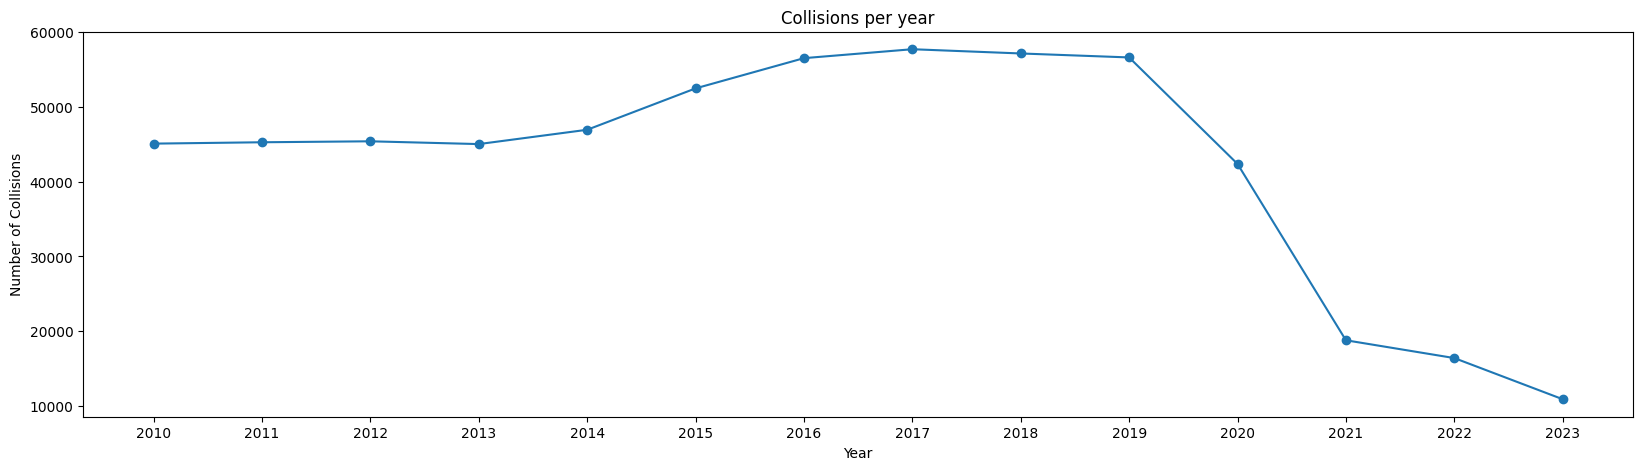

In [9]:
plt.subplots(figsize = (20,5))
v = df['Year Occurred'].value_counts()
v.head()
v = v.sort_index()
v.head()
v.plot(title='Collisions per year', xlabel='Year', ylabel = 'Number of Collisions', xticks=np.arange(2010,2024,1), marker='o')
plt.show()

**Question:** What trend do you observe? What happened in 2020? in 2021? (15 points)

**Answer**： According to the figure, I find that before 2019, the number of collisions kept rising during this time. After 2019, the number of collison dropped significantly. I suppose the reason is that because of the pandemic in 2019, more and more people are able to work at home or use the delievery service instead of going out in person. Since there are less collision on the road.


## Collisions by road

In [10]:
address_count_accidents = df['Address'].value_counts()

# address_count_accidents.head()

# Fetching the top 3 roads with the most accidents
top_3_accidents = address_count_accidents.head(3)

print("Top 3 roads with the most accidents:")
for index, value in top_3_accidents.items():
    print(f"{index}: {value} accidents")

Top 3 roads with the most accidents:
WESTERN                      AV: 7967 accidents
VENTURA                      BL: 7105 accidents
SHERMAN                      WY: 7069 accidents


**Question**: On which road do the highest number of collisions occur?

Does this automatically imply that this road is the most dangerous?

If not, what additional information would be needed to draw such a conclusion? (15 points)


**Answer**: WESTERN AV is the road with the highest number of collisions number. But it doesn't mean that it is the most dangeous road, since it might has the road with the most car passing. The more passing car, there will be more collisions. Therefore, I think the number of passing car for each year should be provided to obtain the possibility of collision.  

## Collisions by age group

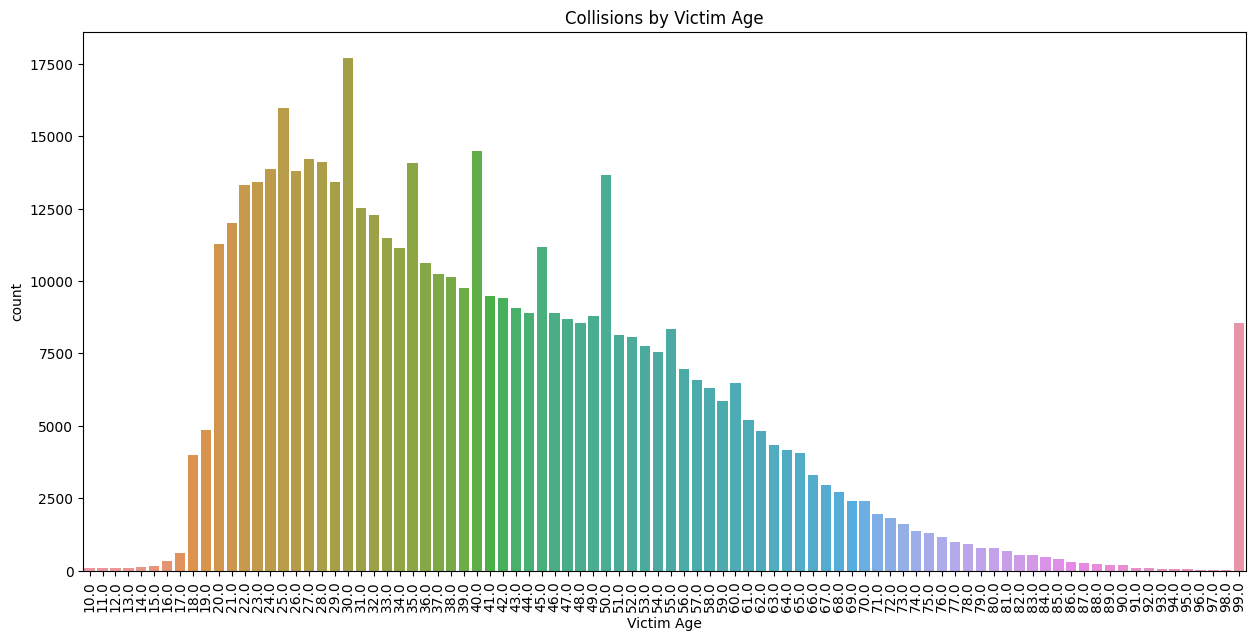

In [11]:
plt.subplots(figsize = (15,7))
sns.countplot(x = df['Victim Age'])
plt.title('Collisions by Victim Age')
plt.xticks(rotation = 90)
plt.show()

**Question**: How do you explain the increase in the 99 age group? How do you explain the spikes at 25, 30, 35, 40, 45... years old? (15 points)

**Answer**: There are many reasons for the increase in 99 age group. As far as I am concerned, it may be the mistake in the data collection and people take the wrong number. As for the age groups of 25, 30,  35, 40, and 45, they are the majority who need to drive to work or trevel in all age groups. Therefore, there may more traffic collisions in this age group.


##Collisions by time of day

In [12]:
import datetime as dt
def convert(x):
  return dt.datetime.strptime(x, '%H:%M')

def getTime(t):
    t = str(t)
    if len(t)==1:
      return t[0]+':'+'00'
    if len(t)<4:
      return t[:1] + ':' + t[1:]
    else:
      return t[:2] + ':' + t[2:]

In [13]:
df1 = df[(df['Year Occurred'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]))]

df1['Time Occurred']= df1['Time Occurred'].apply(getTime)
df1['Time Occurred']=df1['Time Occurred'].apply(convert)
df1.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,Year Reported,Year Occurred
0,190319651,08/24/2019,08/24/2019,1900-01-01 04:50:00,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)",2019,2019
1,190319680,08/30/2019,08/30/2019,1900-01-01 23:20:00,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)",2019,2019
2,190413769,08/25/2019,08/25/2019,1900-01-01 05:45:00,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)",2019,2019
3,190127578,11/20/2019,11/20/2019,1900-01-01 03:50:00,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)",2019,2019
4,190319695,08/30/2019,08/30/2019,1900-01-01 21:00:00,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)",2019,2019


<Axes: ylabel='count'>

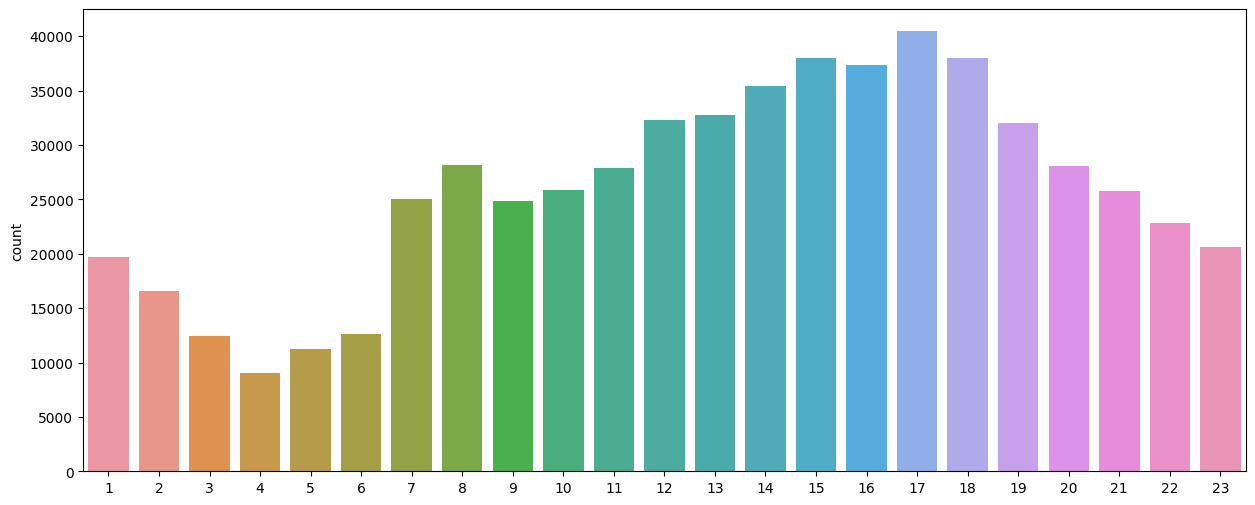

In [14]:
hours = [t.hour for t in df1['Time Occurred'] ]
numbers=[x for x in range(0,24)]
# labels=map(lambda x: str(x), numbers)
plt.subplots(figsize = (15,6))
sns.countplot(x = hours)

**Question**: When are collisions more frequent? Can you form an hypothesis of why that is? What other dataset would you need to confirm your hypothesis? (20 points)

**Answer**: When the time between the 16 and 18, the collisions are more frequent. My hypothesis is that this period is the peak sean in the whole day. There will be more viechles on the roda. To evaluate my hypothesis, I need to collect howmany cars are on the road in different time. Then compare the distributions of two set of data and fin wthether they are related.

## (Bonus) Collisions by weekday

Convert the date to a weekday.

Visualize the number of accidents by weekdays.

In [15]:
#Create new dataframe column for Weekday
df['Weekday'] = pd.to_datetime(df['Date Occurred']).dt.weekday

#Visialize the number of accidents by weekdays
#Your code here#
df.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,Year Reported,Year Occurred,Weekday
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,...,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)",2019,2019,5
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,...,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)",2019,2019,4
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,...,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)",2019,2019,6
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,...,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)",2019,2019,2
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,...,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)",2019,2019,4


In [16]:
# get the statistic data for each weekday.
value_weekday = df["Weekday"].value_counts()
value_weekday
# print(type(value_weekday))

Weekday
4    94411
5    86800
3    85820
2    84524
1    83819
0    82291
6    79130
Name: count, dtype: int64

In [17]:
# change the data shape from the dataframe.
dict_value = value_weekday.to_dict()
x_axis = [day for day in range(min(value_weekday.keys()), max(value_weekday.keys())+1)]
y_axis = [dict_value[day] for day in x_axis ]

print(x_axis)
print(y_axis)

[0, 1, 2, 3, 4, 5, 6]
[82291, 83819, 84524, 85820, 94411, 86800, 79130]


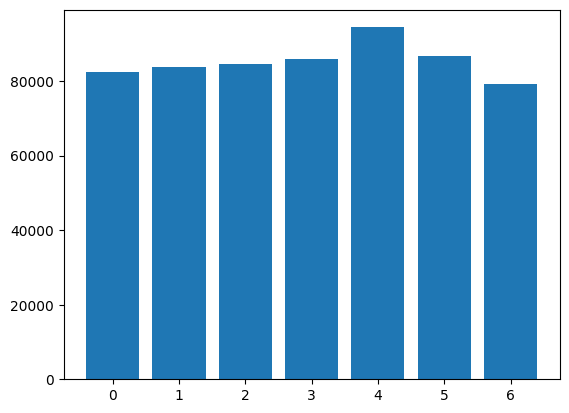

In [18]:
# Plot the data
plt.bar(x_axis, y_axis)
plt.show()

**Question**:
Which day has the most number of collisions? (15 points)

**Answer**: Friday has the most number of collision.